### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
import nest_asyncio
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Python Standard Library
from dataclasses import dataclass
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Load Data

In [ ]:
ratings = pd.read_csv('ratings-00000.tsv', sep="\t")
ratings_labels = ratings.iloc[:, 5:13].columns

positive_ratings = ratings.iloc[:, [5, 7, 8, 9, 10, 11, 12]]
negative_ratings = ratings.iloc[:, [6, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]]
agree_disagree = ratings.iloc[:, 3:5]
time = ratings['createdAtMillis']       

notes = pd.read_csv('notes-00000.tsv', sep="\t")

ratingsWithNotes = notes.set_index('noteId').join(ratings.set_index('noteId'), lsuffix="_note", rsuffix="_rating", how='inner')

p = positive_ratings.astype(bool).sum(axis=0)
n = negative_ratings.astype(bool).sum(axis=0)
ad = agree_disagree.astype(bool).sum(axis=0)

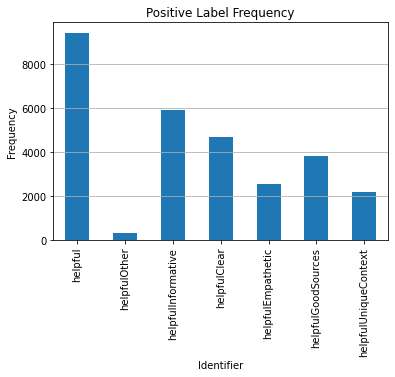

In [ ]:
p.plot(kind='bar', xlabel = 'Identifier', ylabel = 'Frequency', title ='Positive Label Frequency').grid(axis='y')

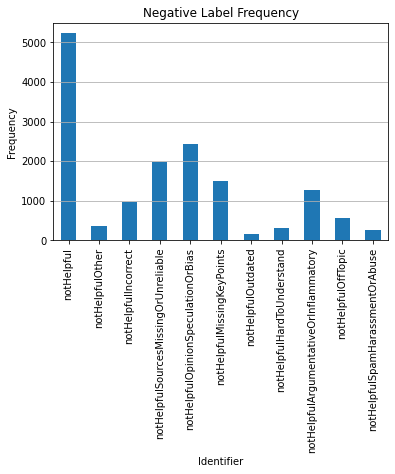

In [ ]:
n.plot(kind='bar', xlabel = 'Identifier', ylabel = 'Frequency', title ='Negative Label Frequency').grid(axis='y')

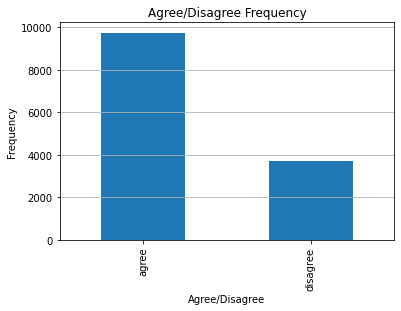

In [ ]:
ad.plot(kind='bar', xlabel = 'Agree/Disagree', ylabel = 'Frequency', title ='Agree/Disagree Frequency').grid(axis='y')

count    1225.000000
mean        3.791020
std         6.635005
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        93.000000
Name: participantId, dtype: float64

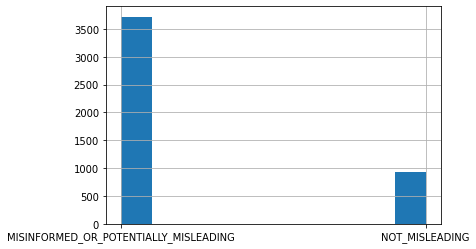

In [ ]:
notes['classification'].hist()
notes['classification'].count()

notes_count = notes['participantId'].value_counts()
ratings_count = ratings['participantId'].value_counts()
notes_count.describe()


<AxesSubplot:>

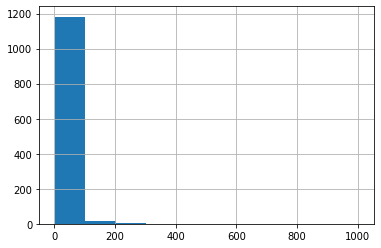

In [ ]:
ratings_count.hist()

<AxesSubplot:>

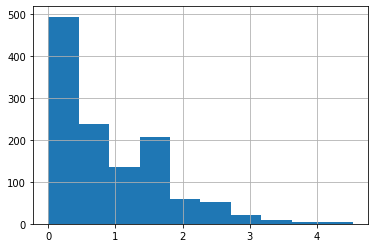

In [ ]:
np.log(notes_count).hist()

In [ ]:
ratings['participantId'].value_counts().describe()

count    1203.000000
mean       12.415628
std        40.576115
min         1.000000
25%         2.000000
50%         4.000000
75%         9.000000
max      1004.000000
Name: participantId, dtype: float64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0e62a2c-7f45-414e-8164-5bf51e09d482' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>